# Image Compression


**Please follow the link to know more about the example: **
https://www.youtube.com/watch?v=H7qMMudo3e8

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os


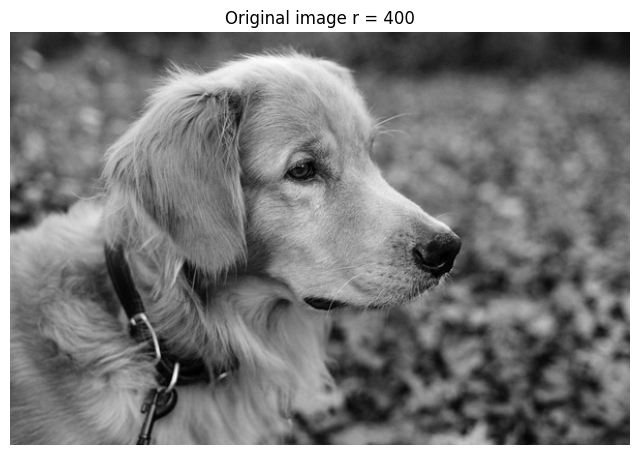

In [39]:
plt.rcParams['figure.figsize'] =[8,8]


A = imread('dog.jpg')
X = A.mean(axis=2)   #Convert to gray scale
#Show image
img = plt.imshow(X, cmap='gray')
plt.title("Original image r = 400")
plt.axis('off')
plt.show()

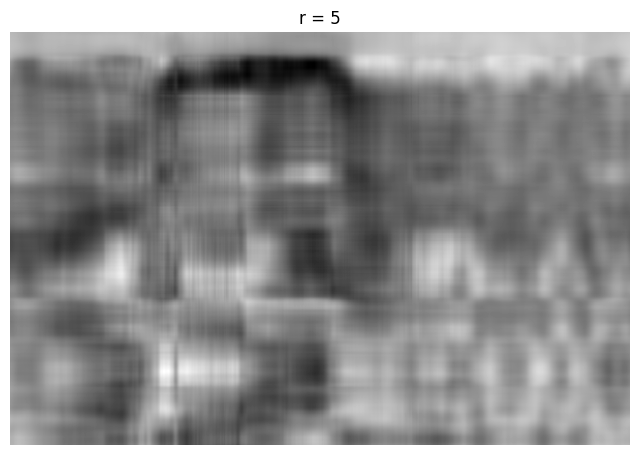

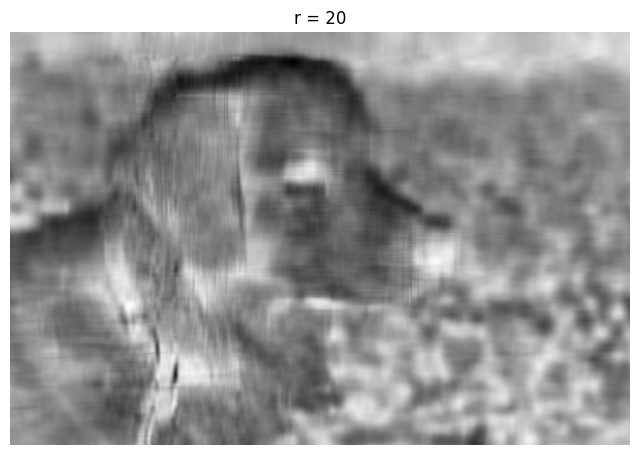

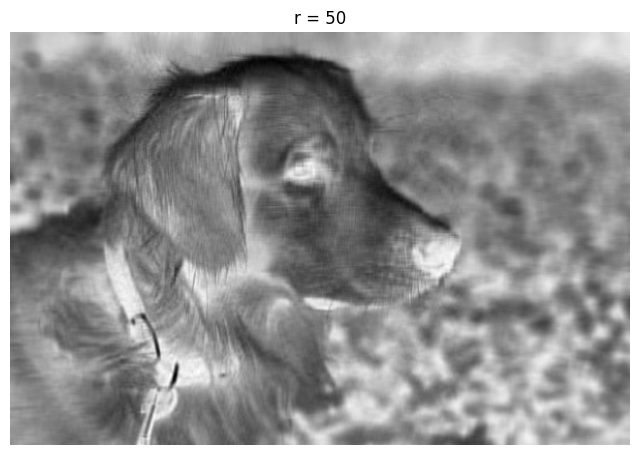

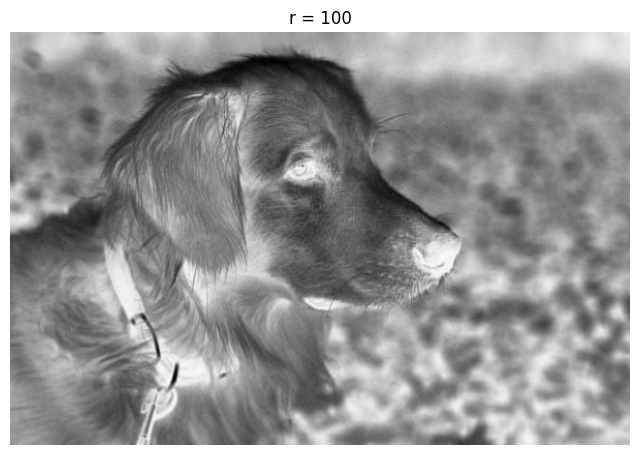

In [38]:

U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

j = 0
for r in (5,20,50,100):
    #Construct approximate image
    X_approx = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(256-X_approx)
    img = plt.imshow(256-X_approx, cmap='gray')
    plt.axis('off')
    plt.title('r = %d' % r)
    plt.show()

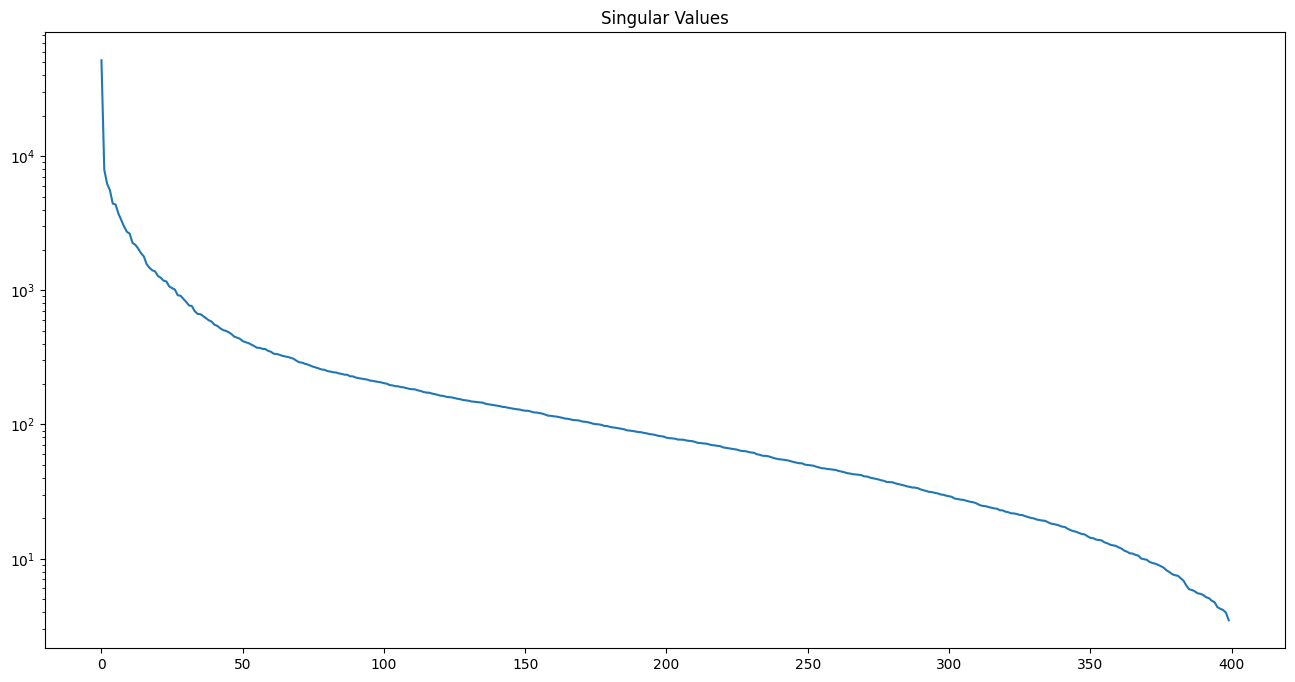

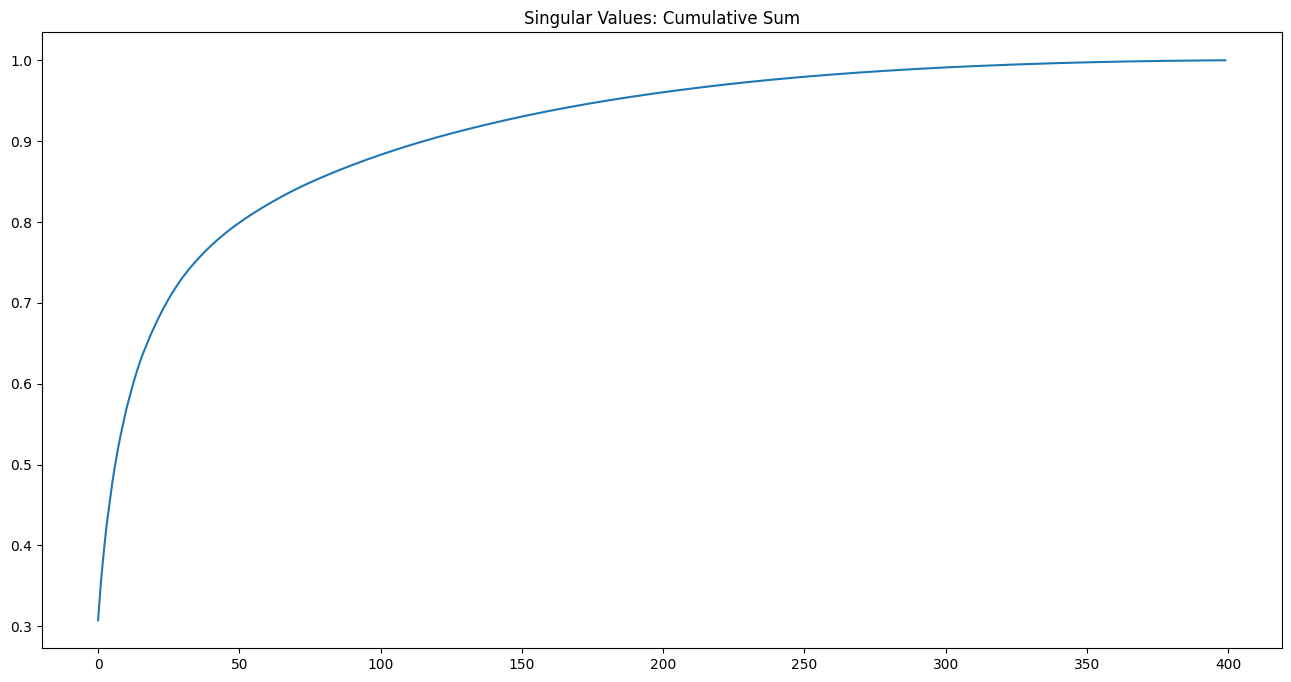

In [17]:
plt.rcParams['figure.figsize'] =[16,8]

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

# Multilinear Regression: Example 2

In [40]:
import pandas as pd
from pandas import read_csv
import seaborn as sns

**Data Inspection**

In [51]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('Housing.csv', header=None, delimiter=r"\s+", names=column_names) #This data contains 13 features and 545 samples
print(data.shape)


(506, 14)


In [52]:
print(data.head(5)) #show first 5 coluum of data

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [53]:
data.info() #Check datatype and features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [54]:
data.describe() #describe statistic of dataset

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

**Data Cleaning**

In [66]:
data.isnull().sum() #check missing value

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Data Analysis**

<AxesSubplot: >

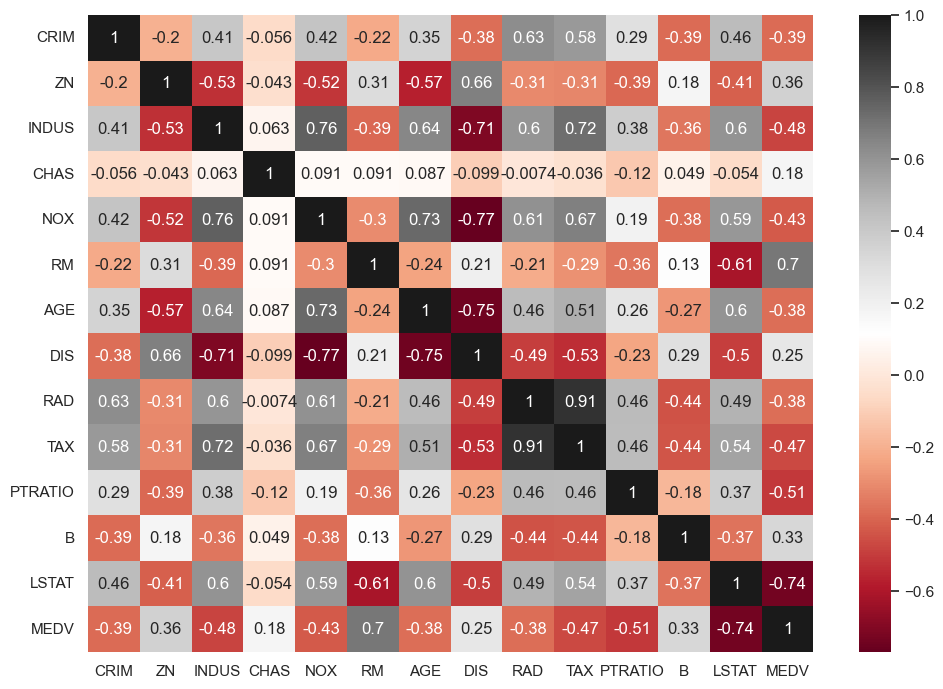

In [73]:
#Plot heat map of data correlation 
sns.heatmap(data.corr(),cmap = 'RdGy',annot=True) 

C:\Users\David\AppData\Local\Temp\ipykernel_10880\1673908831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'], bins=30)


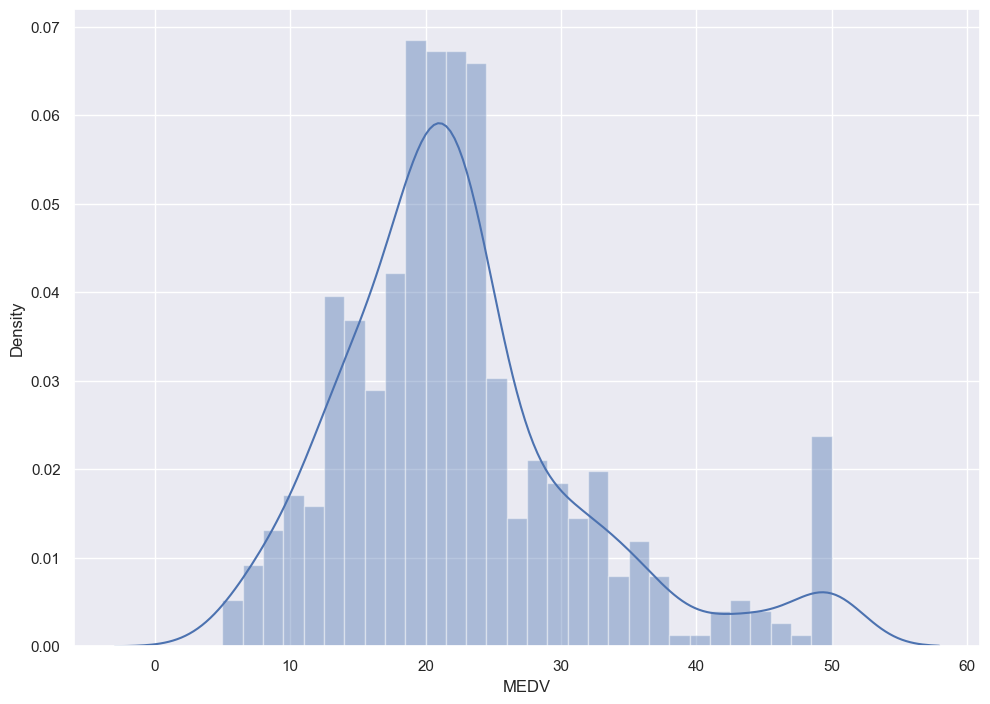

In [68]:
#Plot target variable 'MEDV'
sns.distplot(data['MEDV'], bins=30)
plt.show()

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

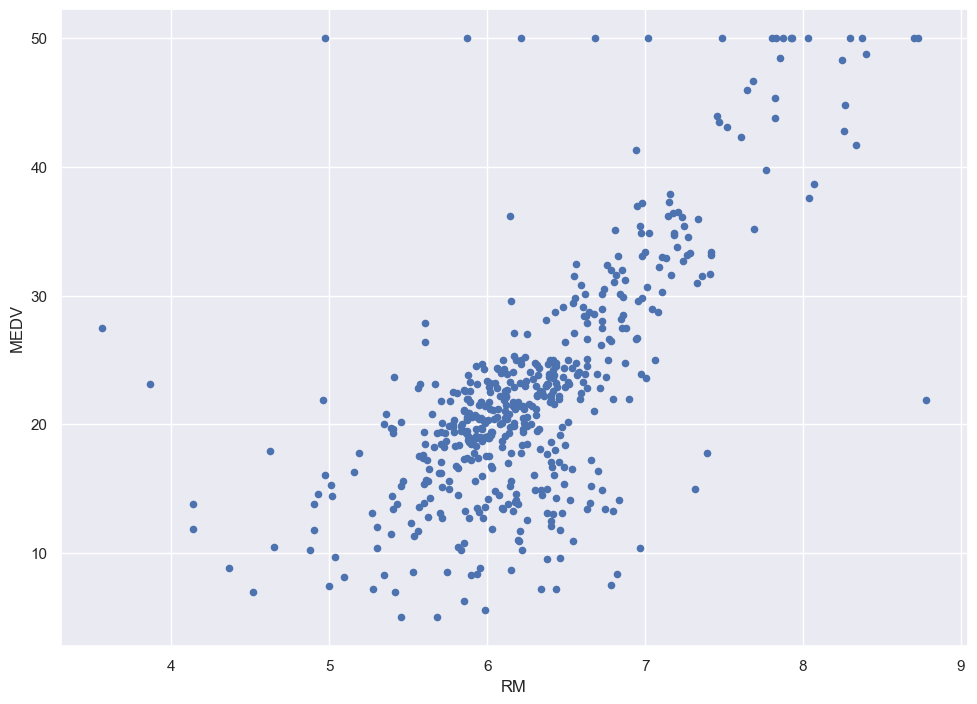

In [77]:
data.plot.scatter('RM', 'MEDV')

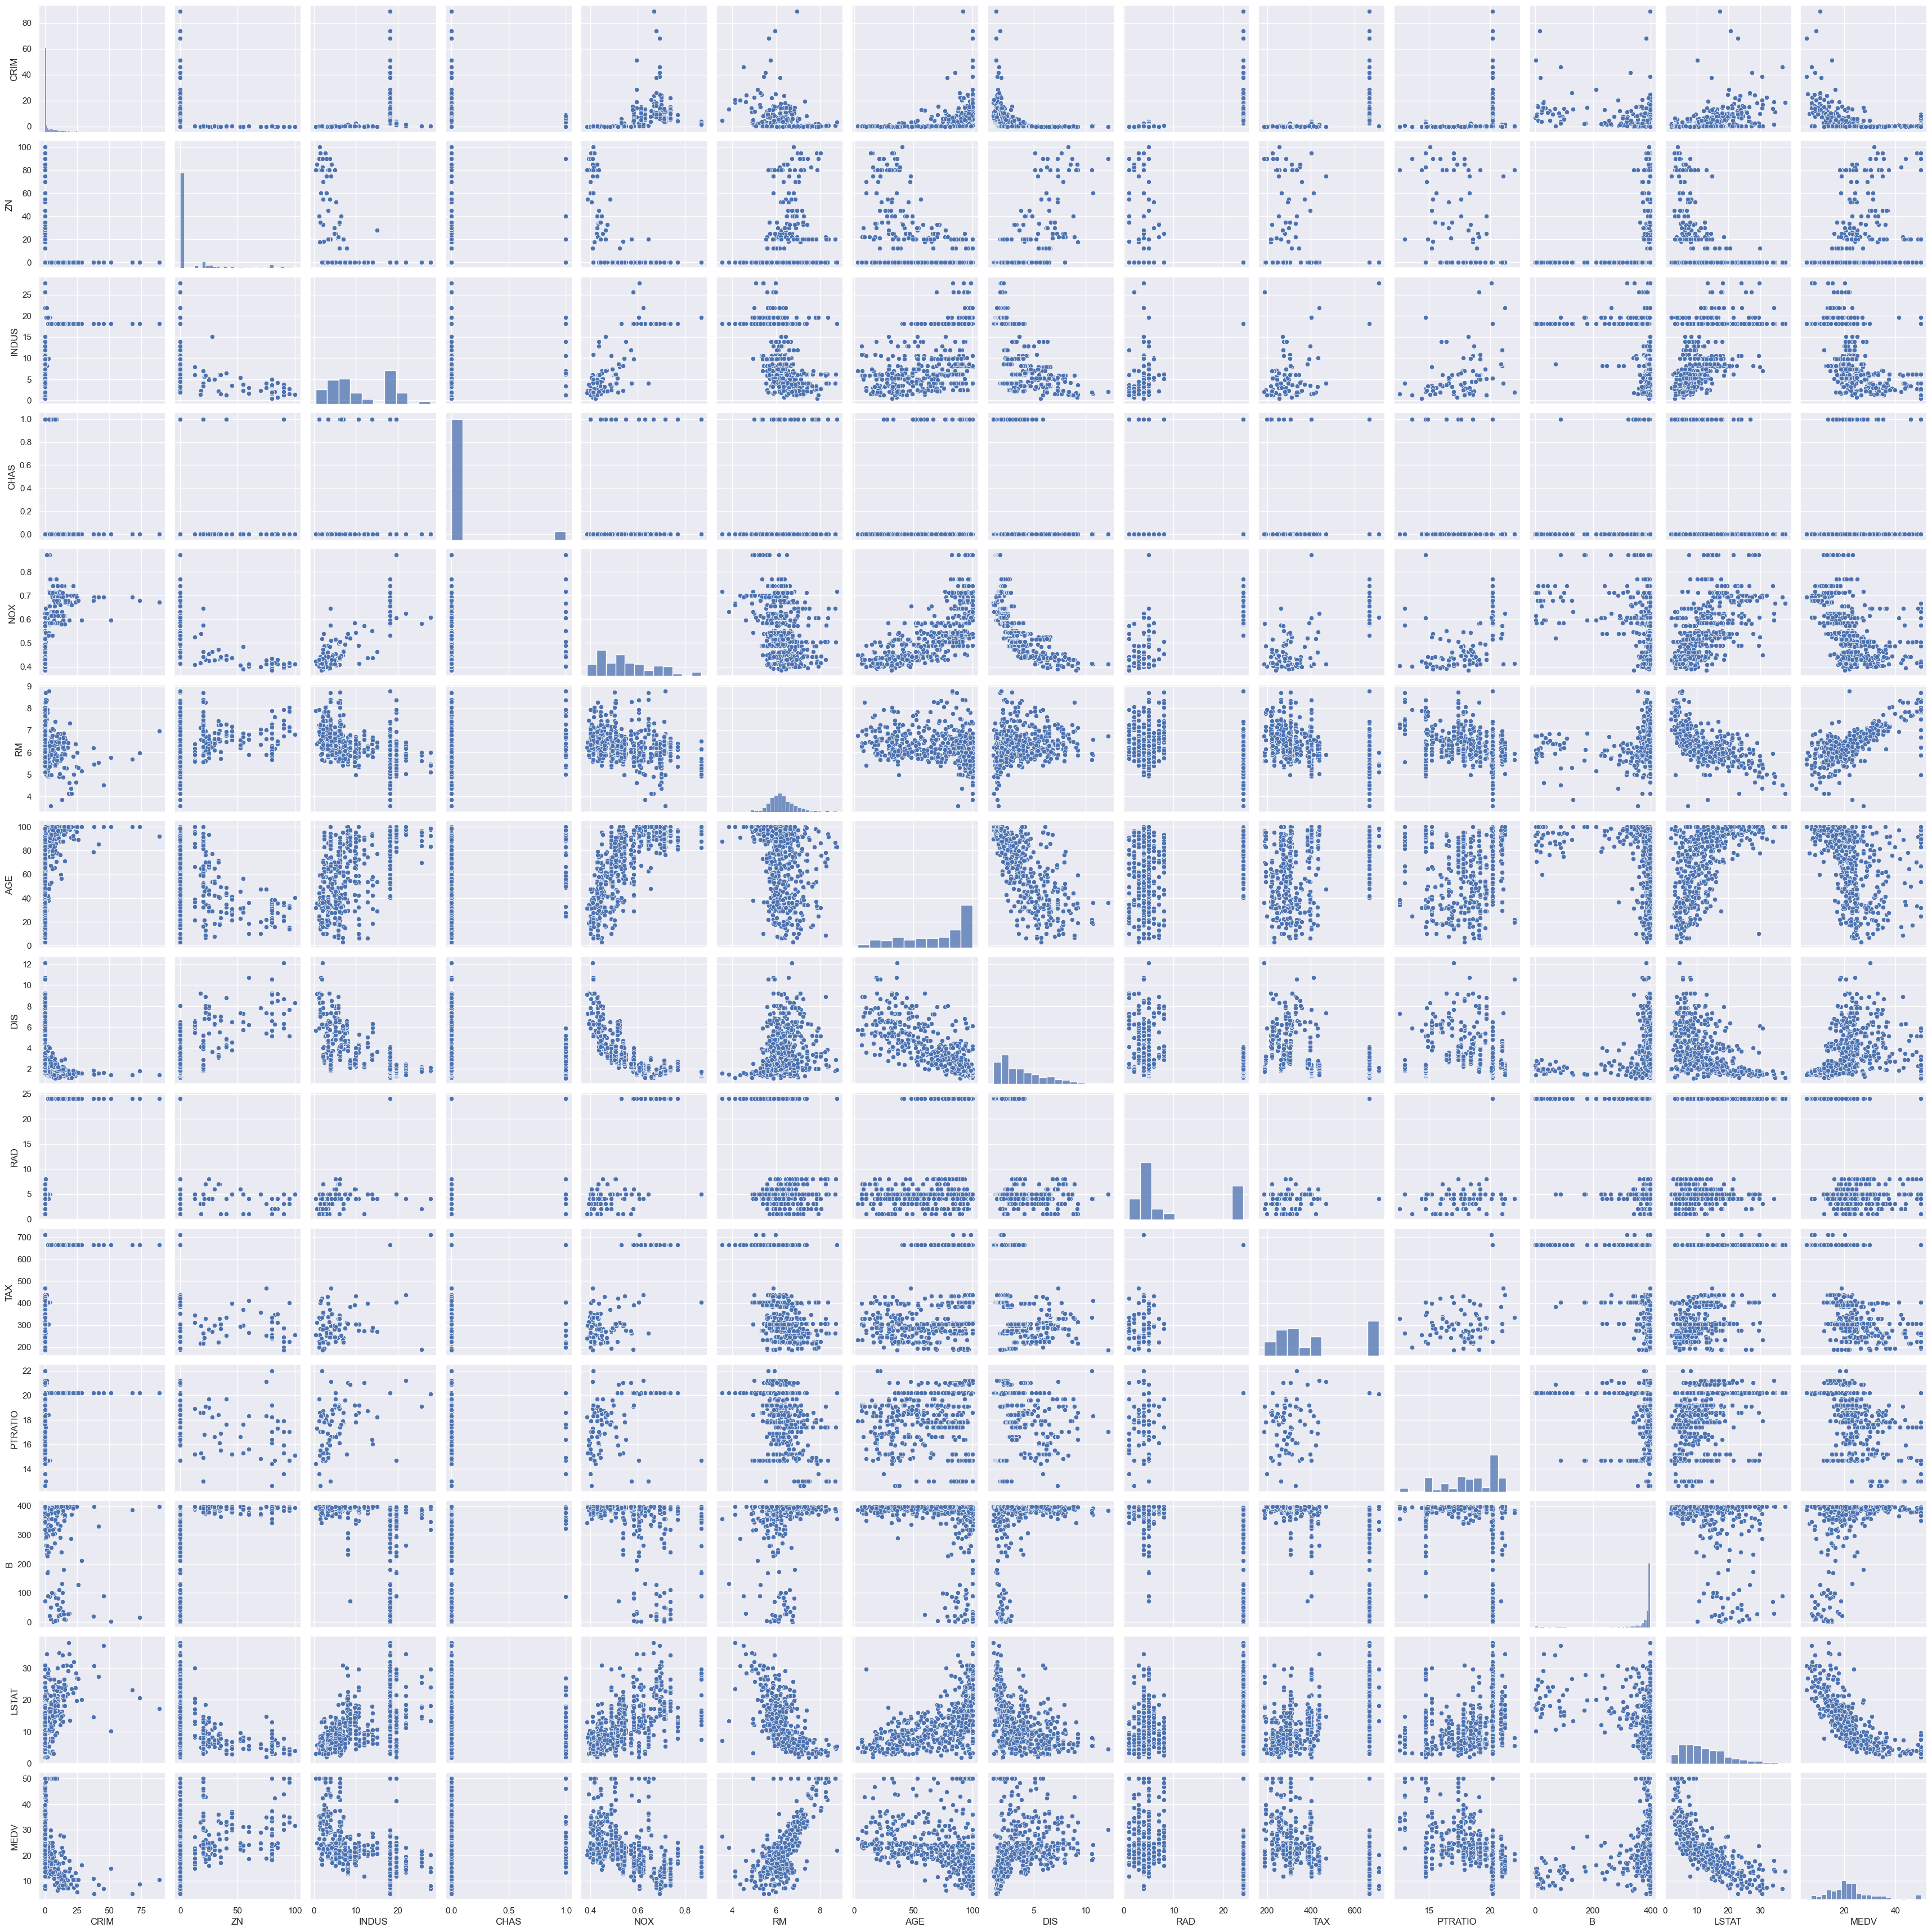

In [83]:
sns.pairplot(data, vars =(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']))

**Training Linear Regression Model**

In [84]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']

In [89]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [100]:
lm = LinearRegression() #call linear regression model
lm.fit(X_train,y_train) #fit data to model

LinearRegression()

In [91]:
predictions = lm.predict(X_test) #make prediction on testing data

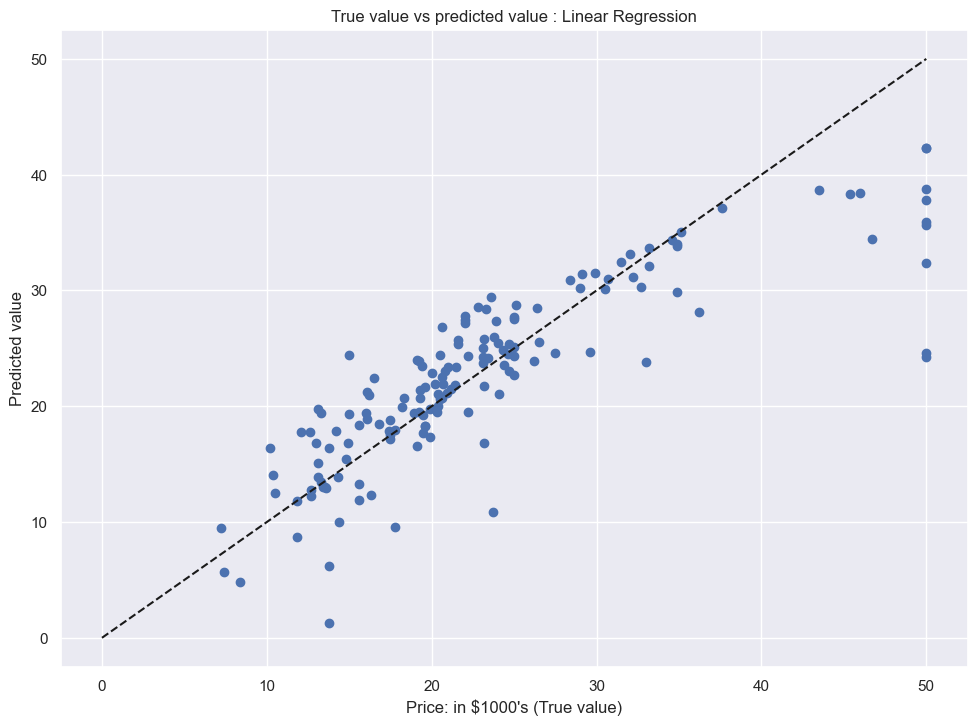

In [104]:
# Plotting Scatter graph to show the prediction
# results - Ture value vs predictions value
plt.scatter(y_test, predictions)
plt.xlabel("Price: in $1000's (True value)")
plt.ylabel("Predicted value")
plt.plot([0, 50], [0, 50], '--k')
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [105]:
lm.score(X_test,y_test) # evaluate model accuracy 

0.7045887712528458

# Example: Breast Cancer Data

In [10]:
from sklearn.datasets import load_breast_cancer 
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Load the Wisconsin breast cancer dataset 
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

In [21]:
print(X.shape) # data contains 569 samples and 30 features
print(y.shape) #569 binary labels with 0 for benign and 1 for malignant

(569, 30)
(569,)


In [22]:
# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [24]:
# Define the indices of the benign and malignant samples
benign_indices = np.where(y == 0)[0]
malignant_indices = np.where(y == 1)[0]

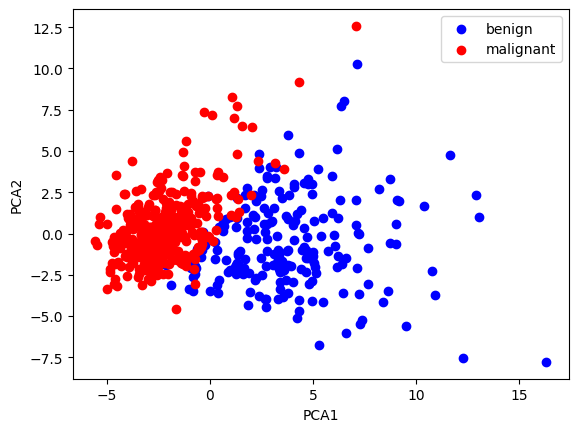

In [25]:
# Plot the first two principal components of the data
plt.scatter(X_pca[benign_indices, 0], X_pca[benign_indices, 1], c='blue', label='benign')
plt.scatter(X_pca[malignant_indices, 0], X_pca[malignant_indices, 1], c='red', label='malignant')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

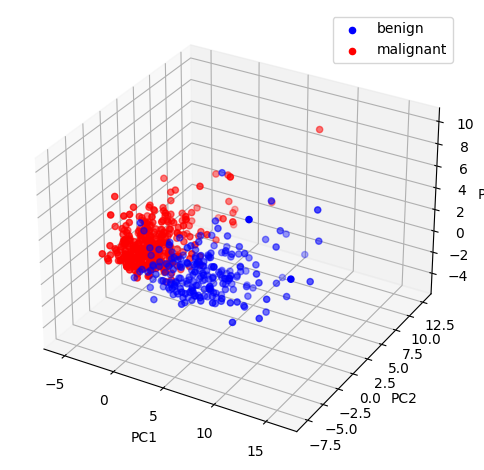

In [26]:
# Create a 3D scatter plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[benign_indices, 0], X_pca[benign_indices, 1], X_pca[benign_indices, 2], c='blue', label='benign')
ax.scatter(X_pca[malignant_indices, 0], X_pca[malignant_indices, 1], X_pca[malignant_indices, 2], c='red', label='malignant')
ax.set_xlabel('PC1',fontsize=10)
ax.set_ylabel('PC2',fontsize=10)
ax.set_zlabel('PC3',fontsize=10)

plt.legend()
fig.tight_layout()
plt.show()

# Eigenfaces Representation

In [1]:
from sklearn.datasets import fetch_lfw_people 

In [2]:
# Load the Yale face dataset
faces = fetch_lfw_people(min_faces_per_person=70,resize =0.4)
X = faces.data
y = faces.target
target_names = faces.target_names

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [4]:
print(target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [5]:
print(X.shape)
print(y.shape)


(1288, 1850)
(1288,)


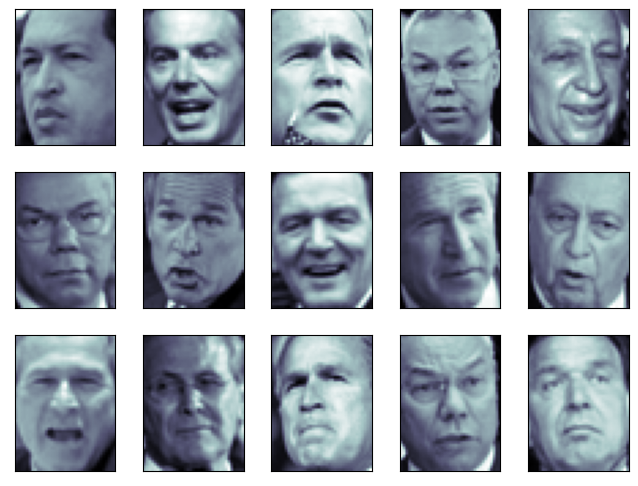

In [6]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(966, 1850) (322, 1850)


In [11]:
# Perform PCA
pca = PCA(n_components=150)
X_pca = pca.fit_transform(X_train)


In [12]:
print(X_pca.shape)

(966, 150)


(-0.5, 36.5, 49.5, -0.5)

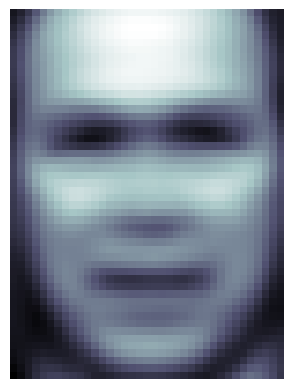

In [91]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)
plt.axis("off")

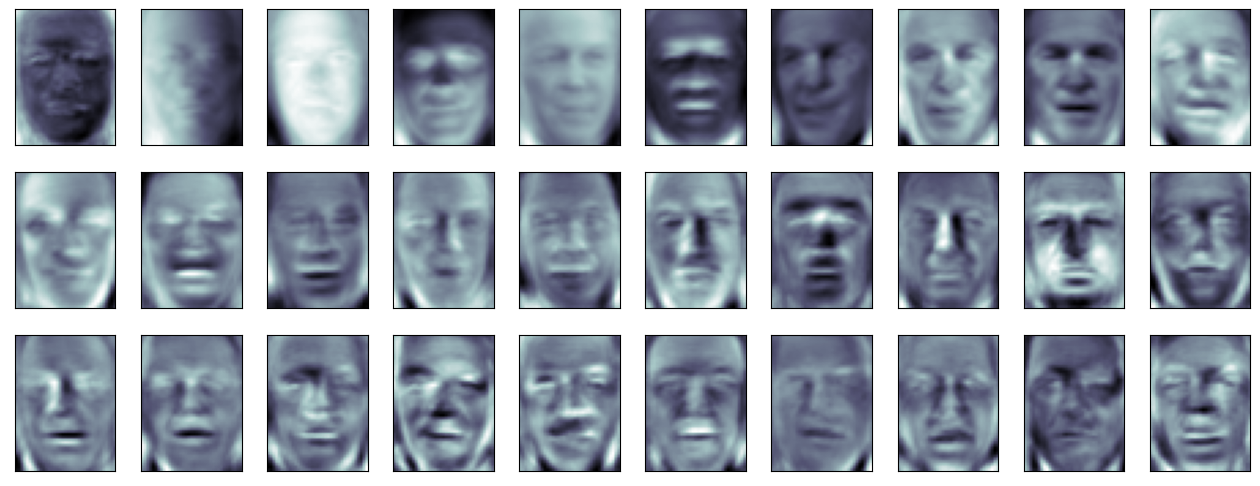

In [93]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [94]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(PCA(n_components=150), SVC(kernel='rbf', class_weight='balanced'))
param_grid = {'svc__C': [1, 5, 10, 50],
                'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)

{'svc__C': 50, 'svc__gamma': 0.005}


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.64      0.72        28
     Colin Powell       0.81      0.89      0.85        63
  Donald Rumsfeld       0.68      0.79      0.73        24
    George W Bush       0.90      0.85      0.88       132
Gerhard Schroeder       0.68      0.85      0.76        20
      Hugo Chavez       0.94      0.77      0.85        22
       Tony Blair       0.72      0.79      0.75        33

         accuracy                           0.82       322
        macro avg       0.79      0.80      0.79       322
     weighted avg       0.83      0.82      0.82       322



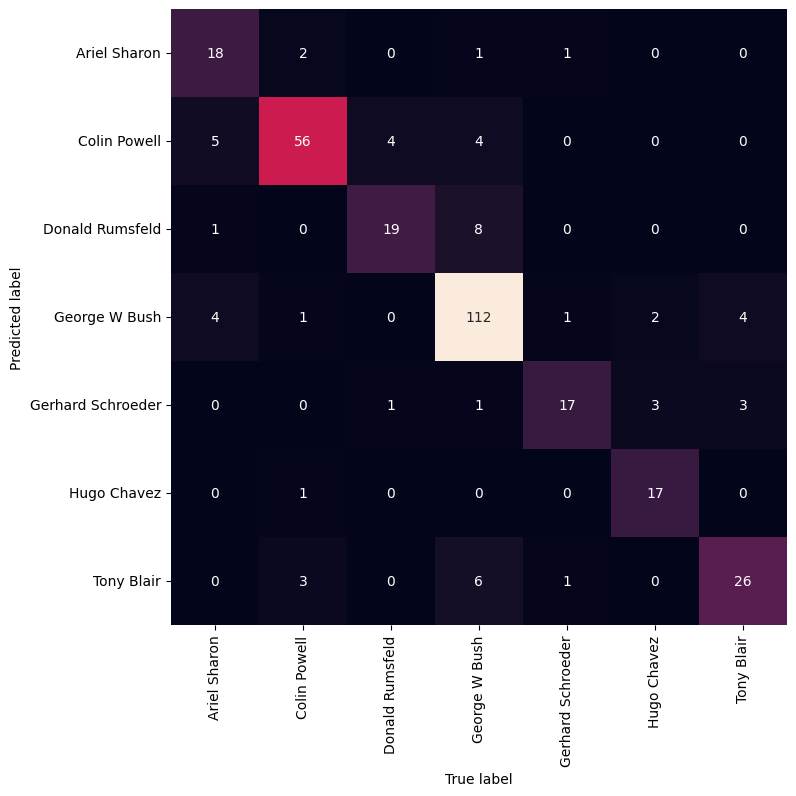

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12, 8))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label');

Text(0.5, 1.05, 'Correct Predictions')

<Figure size 800x800 with 0 Axes>

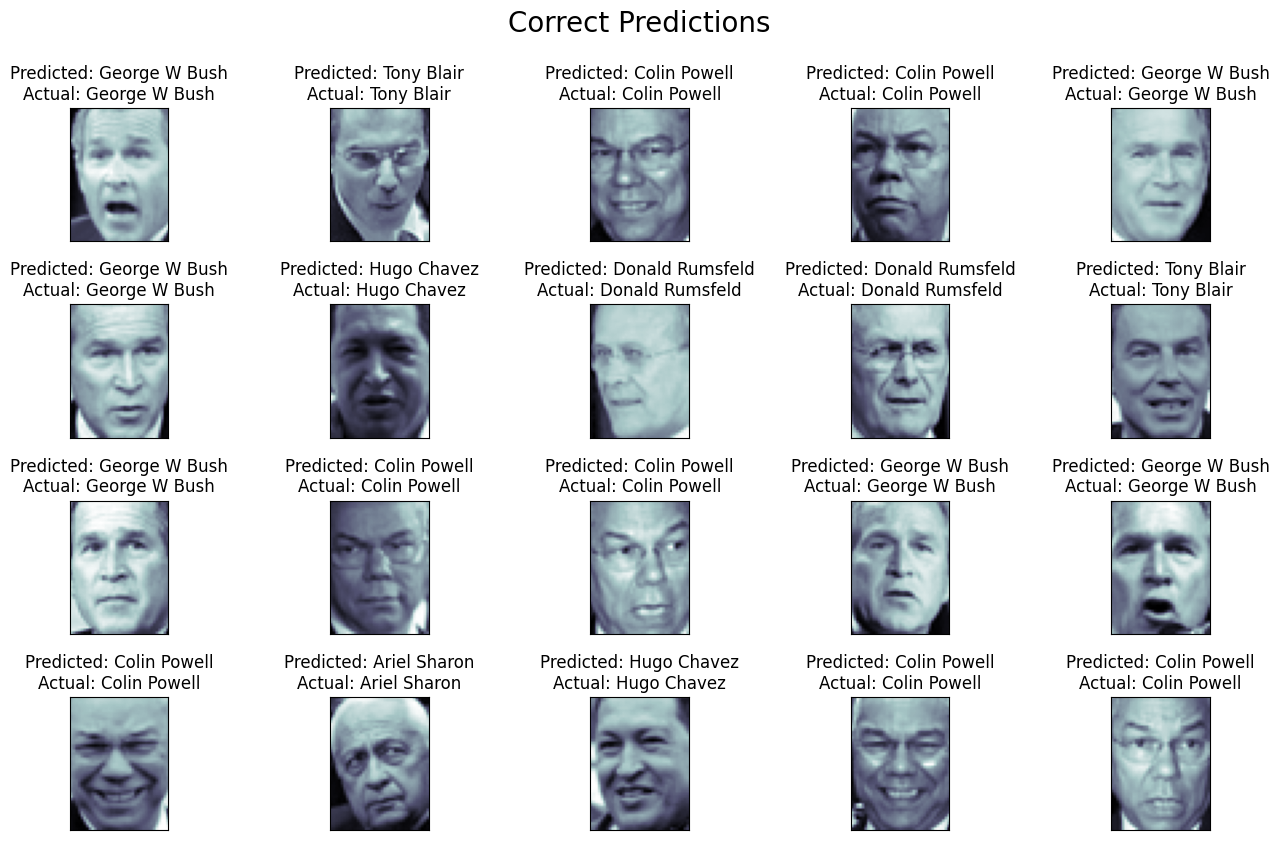

In [122]:
correct_indices = [i for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
fig = plt.figure(figsize=(8, 8))
correct_indices = np.random.choice(correct_indices, 20, replace=False)
fig,axes = plt.subplots(4,5,figsize=(14,8))
for i, correct in enumerate(correct_indices):
    ax = axes[i//5,i%5]
    
    ax.imshow(X_test[correct].reshape(50, 37), cmap=plt.cm.bone)
    ax.set_title("Predicted: {}\nActual: {}".format(target_names[y_pred[correct]], target_names[y_test[correct]]),
                 size=12)
    ax.set_xticks(())
    ax.set_yticks(())
fig.tight_layout()
fig.suptitle('Correct Predictions', fontsize=20, y=1.05)

Text(0.5, 1.05, 'Incorrect Predictions')

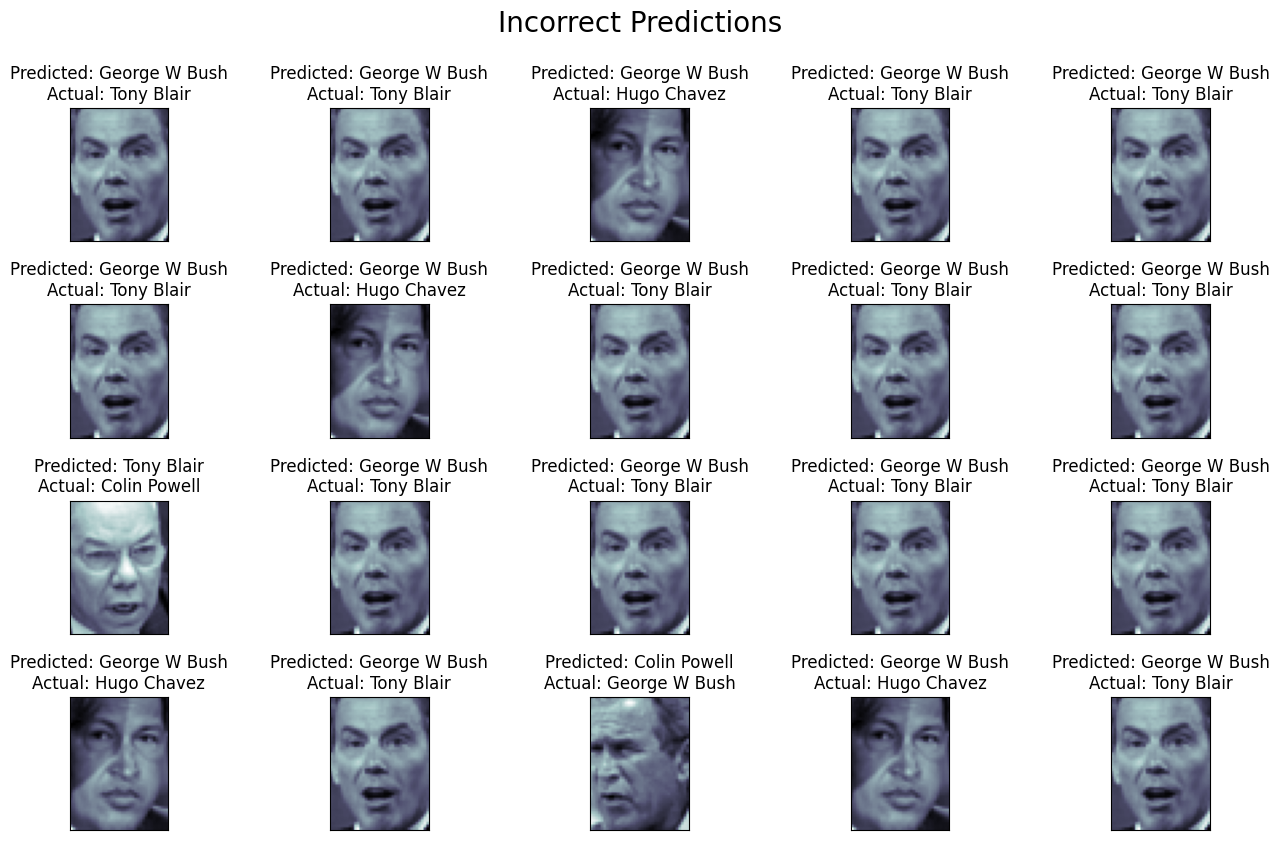

In [123]:
incorrect_indices = np.random.choice(incorrect_indices, 20, replace=True)
fig,axes = plt.subplots(4,5,figsize=(14,8))
for i, incorrect in enumerate(incorrect_indices):
    ax = axes[i//5,i%5]
    ax.imshow(X_test[incorrect].reshape(50, 37), cmap=plt.cm.bone)
    ax.set_title("Predicted: {}\nActual: {}".format(target_names[y_pred[incorrect]], target_names[y_test[incorrect]]),
                 size=12)
    ax.set_xticks(())
    ax.set_yticks(())
fig.tight_layout()
fig.suptitle('Incorrect Predictions', fontsize=20, y=1.05)


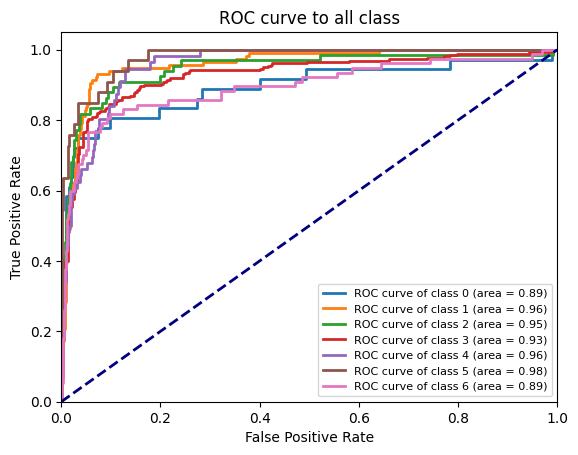

In [132]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# Binarize the output 7 classes
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=40)     
# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                    ))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve to all class')
plt.legend(loc="lower right", prop={'size': 8})
plt.show()